In [14]:
!pip install tensorflow 
!pip install tensorflow 


FileNotFoundError: [Errno 2] No such file or directory: 'null/Users/musa.jawad'

Import All Neccessary Packages


In [3]:

import numpy as np
import tensorflow as tf
from keras import layers
from keras import models
from keras.datasets import mnist

2025-04-23 01:21:58.386598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745371319.920747   29025 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745371320.364933   29025 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745371324.489233   29025 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745371324.489277   29025 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745371324.489280   29025 computation_placer.cc:177] computation placer alr

Preprocessing

In [4]:
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


CNN Model

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1),
          padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

/anaconda/envs/azureml_py38_PT_TF/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-23 01:22:47.806509: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
history=model.fit(X_train, Y_train, batch_size=128,
                  epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.8474 - loss: 0.5095 - val_accuracy: 0.9729 - val_loss: 0.0929
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9609 - loss: 0.1316 - val_accuracy: 0.9780 - val_loss: 0.0696
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9741 - loss: 0.0881 - val_accuracy: 0.9812 - val_loss: 0.0565
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9786 - loss: 0.0702 - val_accuracy: 0.9832 - val_loss: 0.0541
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9822 - loss: 0.0583 - val_accuracy: 0.9864 - val_loss: 0.0437
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9846 - loss: 0.0490 - val_accuracy: 0.9844 - val_loss: 0.0467
Epoch 7/30
469/4

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,384,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,158,080 (15.86 MB)

 Trainable params: 1,386,026 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,772,054 (10.57 MB)

In [8]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 1s - 3ms/step - accuracy: 0.9855 - loss: 0.0653
Test loss: 6.531882286071777
Test accuracy: 98.54999780654907


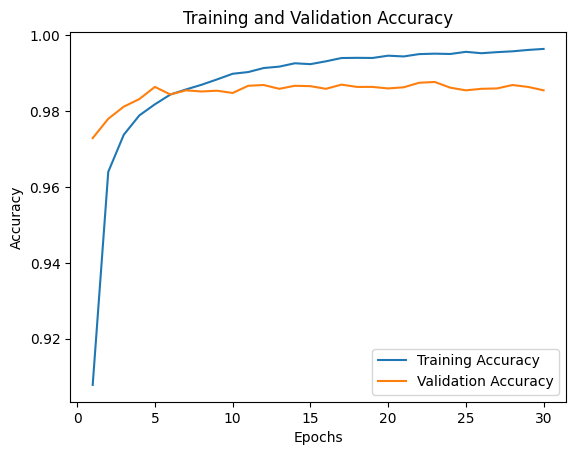

In [9]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

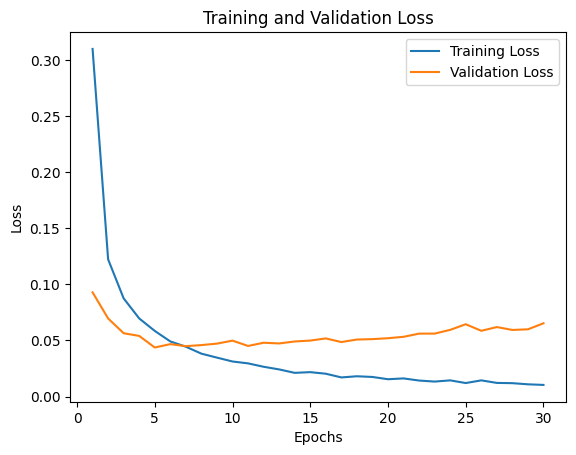

In [10]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
import time
import numpy as np

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train, Y_train, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / X_train.shape[0]

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9961 - loss: 0.0112 - val_accuracy: 0.9874 - val_loss: 0.0642
Epoch Time: 20.68 seconds

Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9860 - val_loss: 0.0620
Epoch Time: 20.68 seconds

Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9960 - loss: 0.0108 - val_accuracy: 0.9867 - val_loss: 0.0596
Epoch Time: 20.68 seconds

Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9967 - loss: 0.0095 - val_accuracy: 0.9867 - val_loss: 0.0646
Epoch Time: 20.68 seconds

Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9967 - loss: 0.0094 - val_accuracy: 0.9871 - val_loss: 0.0649
Epoch Time: 20.68 seconds

Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [12]:
import time
import numpy as np

# Use 50% of training data
X_train_half = X_train[:len(X_train)//2]
Y_train_half = Y_train[:len(Y_train)//2]

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train_half, Y_train_half, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / len(X_train_half)

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics (50% Training Data) ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9984 - loss: 0.0045 - val_accuracy: 0.9879 - val_loss: 0.0777
Epoch Time: 10.36 seconds

Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9871 - val_loss: 0.0803
Epoch Time: 6.88 seconds

Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9985 - loss: 0.0055 - val_accuracy: 0.9877 - val_loss: 0.0771
Epoch Time: 6.94 seconds

Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9979 - loss: 0.0052 - val_accuracy: 0.9871 - val_loss: 0.0834
Epoch Time: 10.36 seconds

Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9985 - loss: 0.0044 - val_accuracy: 0.9867 - val_loss: 0.0794
Epoch Time: 6.90 seconds

Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - ac

In [13]:
import time
import numpy as np

# Use 25% of training data
X_train_quarter = X_train[:len(X_train)//4]
Y_train_quarter = Y_train[:len(Y_train)//4]

# Measure total time and epoch time
epoch_times = []
total_start = time.time()

for epoch in range(30):
    print(f"\nEpoch {epoch+1}/30")
    start = time.time()
    history_epoch = model.fit(X_train_quarter, Y_train_quarter, batch_size=128, epochs=1, validation_data=(X_test, Y_test), verbose=1)
    end = time.time()
    epoch_duration = end - start
    epoch_times.append(epoch_duration)
    print(f"Epoch Time: {epoch_duration:.2f} seconds")

total_end = time.time()
total_time = total_end - total_start
avg_epoch_time = np.mean(epoch_times)
avg_step_time = (avg_epoch_time * 128) / len(X_train_quarter)

# Evaluate final test performance
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0] * 100
accuracy_cnn = test_scores[1] * 100

# Print results
print("\n--- Final Metrics (25% Training Data) ---")
print(f"Test Loss: {loss_cnn:.2f}")
print(f"Test Accuracy: {accuracy_cnn:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")
print(f"Average Epoch Time: {avg_epoch_time:.2f} seconds")
print(f"Step Time (approximate per batch): {avg_step_time:.4f} seconds")



Epoch 1/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9874 - val_loss: 0.0876
Epoch Time: 4.75 seconds

Epoch 2/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9871 - val_loss: 0.0913
Epoch Time: 4.01 seconds

Epoch 3/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9871 - val_loss: 0.0902
Epoch Time: 5.20 seconds

Epoch 4/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9863 - val_loss: 0.1033
Epoch Time: 4.64 seconds

Epoch 5/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9992 - loss: 0.0026 - val_accuracy: 0.9864 - val_loss: 0.0937
Epoch Time: 4.06 seconds

Epoch 6/30
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms

In [2]:
import os, psutil

print(f"Total CPUs: {os.cpu_count()}")
ram = psutil.virtual_memory()
print(f"Total RAM: {ram.total / (1024**3):.2f} GB")

Total CPUs: 2
Total RAM: 13.65 GB
